The first experiment here will be to replicate run 0 conducted in wind_cnn.ipynb and will be used to validate the new classes and functions created in wind_cnn.py which will be a standalone script. 


WindFaultCNN(
  (conv1): Conv1d(19, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=160, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1, Loss: 1.1658329017234572
Epoch 2, Loss: 0.9636082764827844
Epoch 3, Loss: 0.9611976507938269
Epoch 4, Loss: 0.9615334564989263
Epoch 5, Loss: 0.9620453736998819
Epoch 6, Loss: 0.9616994619369507
Epoch 7, Loss: 0.9620749361587293
Epoch 8, Loss: 0.9612089987957116
Epoch 9, Loss: 0.9623270869255066
Epoch 10, Loss: 0.9621023813883464
Training complete.
Test Loss: 1.0520
Test Accuracy: 0.8584

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        91
           1     1.0000    0.7486    0.8562       183
    

c:\Users\aeg00011\Desktop\Windsim\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aeg00011\Desktop\Windsim\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aeg00011\Desktop\Windsim\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

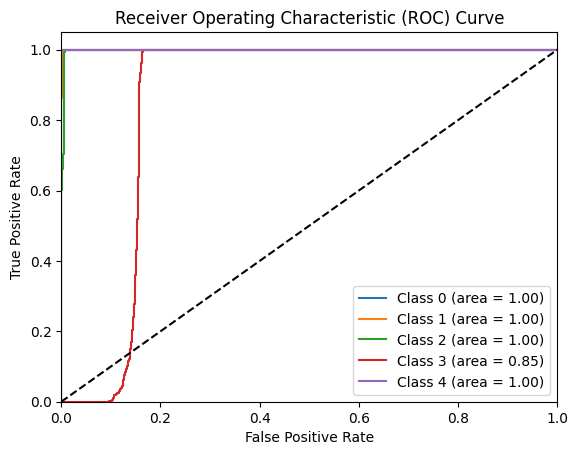

(0.8584006754311905,
 '              precision    recall  f1-score   support\n\n           0     1.0000    1.0000    1.0000        91\n           1     1.0000    0.7486    0.8562       183\n           2     0.9535    1.0000    0.9762      1107\n           3     0.0000    0.0000    0.0000      1128\n           4     0.8377    1.0000    0.9117      5782\n\n    accuracy                         0.8584      8291\n   macro avg     0.7582    0.7497    0.7488      8291\nweighted avg     0.7446    0.8584    0.7960      8291\n',
 array([[  91,    0,    0,    0,    0],
        [   0,  137,   46,    0,    0],
        [   0,    0, 1107,    0,    0],
        [   0,    0,    8,    0, 1120],
        [   0,    0,    0,    0, 5782]]),
 {0: np.float64(1.0),
  1: np.float64(0.9998955359477653),
  2: np.float64(0.9980378961176398),
  3: np.float64(0.8507380817300886),
  4: np.float64(1.0)})

In [6]:
import os
from wind_cnn import WindFaultDataset, WindFaultCNN, train_model, evaluate_model
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### Hyperparameters
WINDOW_SIZE = 20
OVERLAP_SIZE = 15
LR = 0.001
NUM_CLASSES = 5
BATCH_SIZE = 5
NUM_FEATURES = 19
CRITERION = torch.nn.CrossEntropyLoss()
LABEL_MAPPING = {
    "3P": 4,  # 3-phase to ground
    "2P": 3,   # 2-phase line to line
    "2P.EARTH": 2, # 2-phase to earth
    "1P": 1,    # 1-pole line to ground
    "normal": 0  # Normal
}

training_data = 'Dataset1'
test_data = 'Distribution_faults'
train_paths = []
test_paths = []
for file in os.listdir(training_data):
    train_paths.append(os.path.join(training_data, file))
for file in os.listdir(test_data):
    test_paths.append(os.path.join(test_data, file))

train_set = WindFaultDataset(train_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
test_set = WindFaultDataset(test_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
train_dataloader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_set, BATCH_SIZE, shuffle=False)

model67 = WindFaultCNN(NUM_FEATURES, NUM_CLASSES, WINDOW_SIZE)
print(model67)
train_model(model67, train_dataloader, 10, LR)
evaluate_model(model67, test_dataloader, CRITERION, NUM_CLASSES)


Experiment 0.1 flipping the train and testing sets of the model . Balancing training data. 


WindFaultCNN(
  (conv1): Conv1d(19, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=160, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1, Loss: 1.1183654465237443
Epoch 2, Loss: 0.9074689636425096
Epoch 3, Loss: 0.9052432291969961
Epoch 4, Loss: 0.9050186988042326
Epoch 5, Loss: 0.9049454547312795
Epoch 6, Loss: 0.9049083222540057
Epoch 7, Loss: 0.904886178520261
Epoch 8, Loss: 0.9048733507492104
Epoch 9, Loss: 0.9048636929721249
Epoch 10, Loss: 0.9048571373735156
Training complete.
Test Loss: 1.4687
Test Accuracy: 0.4237

Classification Report:
               precision    recall  f1-score   support

           0     0.9514    1.0000    0.9751       862
           1     0.8476    0.7596    0.8012       183
     

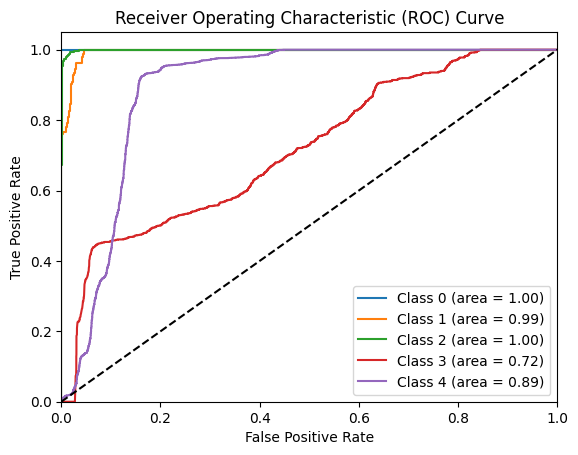

(0.42374751710439196,
 '              precision    recall  f1-score   support\n\n           0     0.9514    1.0000    0.9751       862\n           1     0.8476    0.7596    0.8012       183\n           2     0.9840    0.9431    0.9631      1107\n           3     0.1643    0.8652    0.2761      1128\n           4     0.8273    0.1416    0.2419      5782\n\n    accuracy                         0.4237      9062\n   macro avg     0.7549    0.7419    0.6515      9062\nweighted avg     0.7761    0.4237    0.4153      9062\n',
 array([[ 862,    0,    0,    0,    0],
        [  44,  139,    0,    0,    0],
        [   0,   25, 1044,    2,   36],
        [   0,    0,   17,  976,  135],
        [   0,    0,    0, 4963,  819]]),
 {0: np.float64(1.0),
  1: np.float64(0.9944942847278253),
  2: np.float64(0.9991478716379454),
  3: np.float64(0.7161165720921003),
  4: np.float64(0.8901726658005079)})

In [ ]:
import os
from wind_cnn import WindFaultDataset, WindFaultCNN, train_model, evaluate_model
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### Hyperparameters
WINDOW_SIZE = 20
OVERLAP_SIZE = 15
LR = 0.001
NUM_CLASSES = 5
BATCH_SIZE = 5
NUM_FEATURES = 19
CRITERION = torch.nn.CrossEntropyLoss()
LABEL_MAPPING = {
    "3P": 4,  # 3-phase to ground
    "2P": 3,   # 2-phase line to line
    "2P.EARTH": 2, # 2-phase to earth
    "1P": 1,    # 1-pole line to ground
    "normal": 0  # Normal
}

test_data = 'Distribution_faults'
training_data = 'Dataset1'
train_paths = []
test_paths = []
for file in os.listdir(training_data):
    train_paths.append(os.path.join(training_data, file))
for file in os.listdir(test_data):
    test_paths.append(os.path.join(test_data, file))

train_set = WindFaultDataset(train_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
test_set = WindFaultDataset(test_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
train_dataloader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_set, BATCH_SIZE, shuffle=False)

model67 = WindFaultCNN(NUM_FEATURES, NUM_CLASSES, WINDOW_SIZE)
print(model67)
train_model(model67, train_dataloader, 10, LR)
evaluate_model(model67, test_dataloader, CRITERION, NUM_CLASSES)


experiment 0.2: Window size and overlap cut down to 10 and 5

WindFaultCNN(
  (conv1): Conv1d(19, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1, Loss: 1.1817143637724596
Epoch 2, Loss: 0.9130538187243722
Epoch 3, Loss: 0.9055837702871573
Epoch 4, Loss: 0.9051626502263426
Epoch 5, Loss: 0.9050468998123901
Epoch 6, Loss: 0.9049947999342524
Epoch 7, Loss: 0.9049451122380266
Epoch 8, Loss: 0.9049201734138258
Epoch 9, Loss: 0.9048966494473544
Epoch 10, Loss: 0.9048826245948521
Training complete.
Test Loss: 1.3976
Test Accuracy: 0.4788

Classification Report:
               precision    recall  f1-score   support

           0     0.9574    1.0000    0.9783       900
           1     0.5393    0.7906    0.6412       191
     

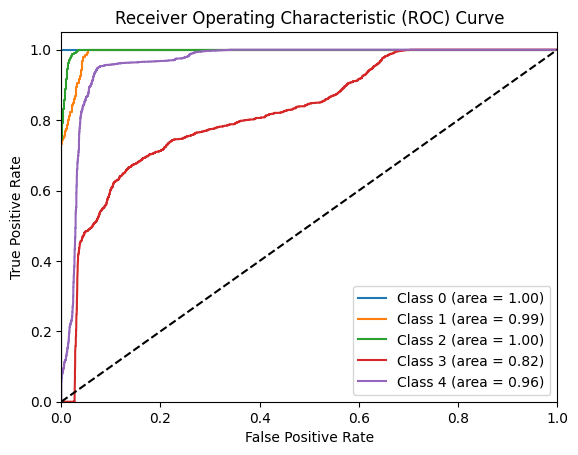

(0.4788404570461278,
 '              precision    recall  f1-score   support\n\n           0     0.9574    1.0000    0.9783       900\n           1     0.5393    0.7906    0.6412       191\n           2     0.9344    0.8883    0.9108      1155\n           3     0.1827    0.8767    0.3024      1176\n           4     0.9510    0.2352    0.3771      6030\n\n    accuracy                         0.4788      9452\n   macro avg     0.7130    0.7581    0.6419      9452\nweighted avg     0.8457    0.4788    0.4956      9452\n',
 array([[ 900,    0,    0,    0,    0],
        [  40,  151,    0,    0,    0],
        [   0,  129, 1026,    0,    0],
        [   0,    0,   72, 1031,   73],
        [   0,    0,    0, 4612, 1418]]),
 {0: np.float64(1.0),
  1: np.float64(0.9928275473739734),
  2: np.float64(0.9977237900101587),
  3: np.float64(0.8239161451192367),
  4: np.float64(0.9630641115482397)})

In [ ]:
import os
from wind_cnn import WindFaultDataset, WindFaultCNN, train_model, evaluate_model
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### Hyperparameters
WINDOW_SIZE = 10
OVERLAP_SIZE = 5
LR = 0.001
NUM_CLASSES = 5
BATCH_SIZE = 5
NUM_FEATURES = 19
CRITERION = torch.nn.CrossEntropyLoss()
LABEL_MAPPING = {
    "3P": 4,  # 3-phase to ground
    "2P": 3,   # 2-phase line to line
    "2P.EARTH": 2, # 2-phase to earth
    "1P": 1,    # 1-pole line to ground
    "normal": 0  # Normal
}

test_data = 'Distribution_faults'
training_data = 'Dataset1'
train_paths = []
test_paths = []
for file in os.listdir(training_data):
    train_paths.append(os.path.join(training_data, file))
for file in os.listdir(test_data):
    test_paths.append(os.path.join(test_data, file))

train_set = WindFaultDataset(train_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
test_set = WindFaultDataset(test_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
train_dataloader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_set, BATCH_SIZE, shuffle=False)

model67 = WindFaultCNN(NUM_FEATURES, NUM_CLASSES, WINDOW_SIZE)
print(model67)
train_model(model67, train_dataloader, 10, LR)
evaluate_model(model67, test_dataloader, CRITERION, NUM_CLASSES)


experiment 0.3: Window size and overlap cut down to 10 and 5 and epochs to 20

WindFaultCNN(
  (conv1): Conv1d(19, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1, Loss: 1.1930967668692272
Epoch 2, Loss: 0.9079435049283384
Epoch 3, Loss: 0.9056546498428691
Epoch 4, Loss: 0.9052364395724403
Epoch 5, Loss: 0.9050736541699882
Epoch 6, Loss: 0.9049905421155872
Epoch 7, Loss: 0.9049435140508594
Epoch 8, Loss: 0.9049134567530468
Epoch 9, Loss: 0.9048973291811316
Epoch 10, Loss: 0.9048814273843861
Epoch 11, Loss: 0.9048722554938962
Epoch 12, Loss: 0.904864024032246
Epoch 13, Loss: 0.9048586677421223
Epoch 14, Loss: 0.9048544854828806
Epoch 15, Loss: 0.9048502761306185
Epoch 16, Loss: 0.904847981050761
Epoch 17, Loss: 0.9048458033739918
Epoch 18,

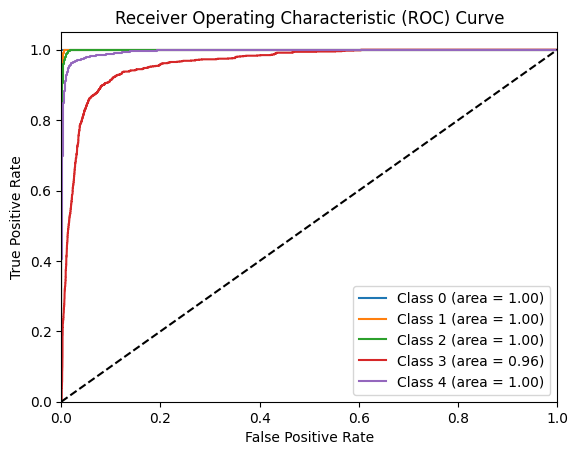

(0.8039568345323741,
 '              precision    recall  f1-score   support\n\n           0     0.9989    1.0000    0.9994       900\n           1     0.7787    0.9948    0.8736       191\n           2     0.9683    0.9506    0.9594      1155\n           3     0.3922    0.9617    0.5571      1176\n           4     0.9979    0.7098    0.8295      6030\n\n    accuracy                         0.8040      9452\n   macro avg     0.8272    0.9234    0.8438      9452\nweighted avg     0.9146    0.8040    0.8286      9452\n',
 array([[ 900,    0,    0,    0,    0],
        [   1,  190,    0,    0,    0],
        [   0,   54, 1098,    3,    0],
        [   0,    0,   36, 1131,    9],
        [   0,    0,    0, 1750, 4280]]),
 {0: np.float64(1.0),
  1: np.float64(0.9998111768600069),
  2: np.float64(0.999202757790199),
  3: np.float64(0.9607262249994246),
  4: np.float64(0.9950090769608029)})

In [ ]:
import os
from wind_cnn import WindFaultDataset, WindFaultCNN, train_model, evaluate_model
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### Hyperparameters
WINDOW_SIZE = 10
OVERLAP_SIZE = 5
LR = 0.001
NUM_CLASSES = 5
BATCH_SIZE = 5
NUM_FEATURES = 19
CRITERION = torch.nn.CrossEntropyLoss()
LABEL_MAPPING = {
    "3P": 4,  # 3-phase to ground
    "2P": 3,   # 2-phase line to line
    "2P.EARTH": 2, # 2-phase to earth
    "1P": 1,    # 1-pole line to ground
    "normal": 0  # Normal
}

test_data = 'Distribution_faults'
training_data = 'Dataset1'
train_paths = []
test_paths = []
for file in os.listdir(training_data):
    train_paths.append(os.path.join(training_data, file))
for file in os.listdir(test_data):
    test_paths.append(os.path.join(test_data, file))

train_set = WindFaultDataset(train_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
test_set = WindFaultDataset(test_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
train_dataloader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_set, BATCH_SIZE, shuffle=False)

model67 = WindFaultCNN(NUM_FEATURES, NUM_CLASSES, WINDOW_SIZE)
print(model67)
train_model(model67, train_dataloader, 20, LR)
evaluate_model(model67, test_dataloader, CRITERION, NUM_CLASSES)


experiment 0.4 Trying balanced training set and testing on noisy data

In [1]:
import os
from wind_cnn import WindFaultDataset, WindFaultCNN, train_model, evaluate_model
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### Hyperparameters ###
WINDOW_SIZE = 10
OVERLAP_SIZE = 5
LR = 0.001
NUM_CLASSES = 5
BATCH_SIZE = 5
NUM_FEATURES = 19
CRITERION = torch.nn.CrossEntropyLoss()
LABEL_MAPPING = {
    "3P": 4,  # 3-phase to ground
    "2P": 3,   # 2-phase line to line
    "2P.EARTH": 2, # 2-phase to earth
    "1P": 1,    # 1-pole line to ground
    "normal": 0  # Normal
}

test_data = 'Dataset1'
training_data = 'Dataset2'
train_paths = []
test_paths = []
for file in os.listdir(training_data):
    train_paths.append(os.path.join(training_data, file))
for file in os.listdir(test_data):
    test_paths.append(os.path.join(test_data, file))

train_set = WindFaultDataset(train_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
test_set = WindFaultDataset(test_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
train_dataloader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_set, BATCH_SIZE, shuffle=False)

model67 = WindFaultCNN(NUM_FEATURES, NUM_CLASSES, WINDOW_SIZE)
print(model67)
train_model(model67, train_dataloader, 20, LR)
evaluate_model(model67, test_dataloader, CRITERION, NUM_CLASSES)



WindFaultCNN(
  (conv1): Conv1d(19, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1, Loss: 1.1865561263492475
Epoch 2, Loss: 0.9080489719143281
Epoch 3, Loss: 0.9054432290677841
Epoch 4, Loss: 0.9051285721361637
Epoch 5, Loss: 0.9050047517969058
Epoch 6, Loss: 0.9049455236930114
Epoch 7, Loss: 0.9049084415802588
Epoch 8, Loss: 0.9048908645143876
Epoch 9, Loss: 0.9048762822953554
Epoch 10, Loss: 0.9048663509579805
Epoch 11, Loss: 0.9048593095861949
Epoch 12, Loss: 0.9048546965305622
Epoch 13, Loss: 0.9048499528032082
Epoch 14, Loss: 0.9048472061180152
Epoch 15, Loss: 0.9048449362699802
Epoch 16, Loss: 0.904842448922304
Epoch 17, Loss: 0.9048411783117515
Epoch 18

RuntimeError: Given groups=1, weight of size [16, 19, 5], expected input[5, 20, 10] to have 19 channels, but got 20 channels instead

In [ ]:
test